In [1]:
## DETECT FRAUDULENT WINE BASED ON FEATURES

# ALL LIBRARY IMPORTED

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
## unique variable in target column

df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

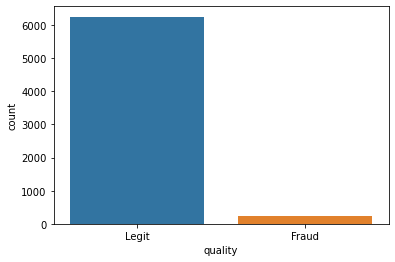

In [7]:
# Count Plot

df['quality'].value_counts()
sns.countplot(x='quality',data=df);

In [10]:
## percentage of red wines are Fraud

reds=df[df['type']=='red']
whites=df[df['type']=='white']

In [9]:
reds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Legit,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Legit,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Legit,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Legit,red


In [11]:
100*len(reds[reds['quality']=='Fraud'])/len(reds)

3.9399624765478425

In [12]:
100*len(whites[whites['quality']=='Fraud'])/len(whites)

3.736218864842793

In [14]:
  ## correlation b/w the various features and quality columns

df['Fraud']=df['quality'].map({'Legit':0,'Fraud':1})
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

<AxesSubplot:>

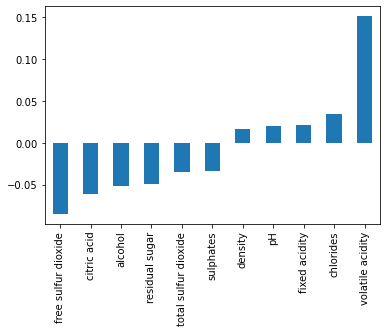

In [15]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

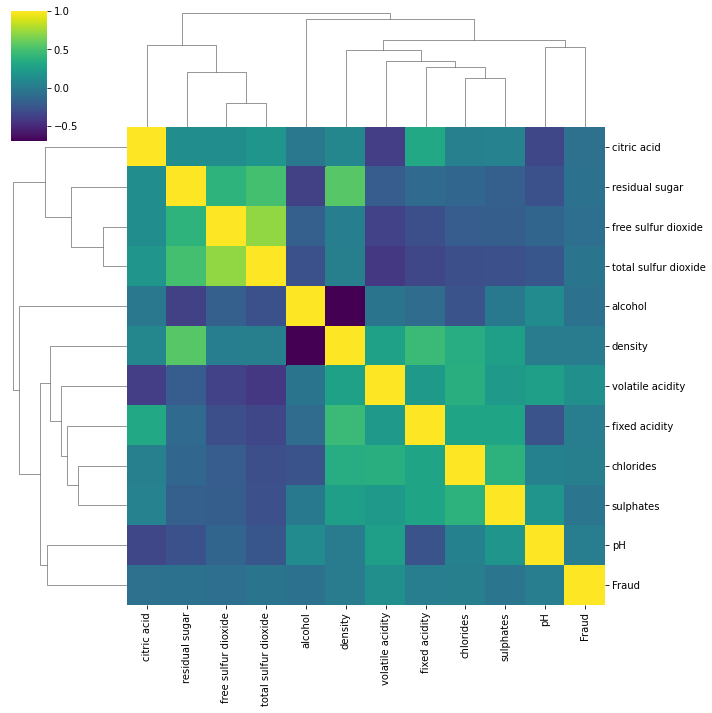

In [17]:
sns.clustermap(df.corr(),cmap='viridis')

In [18]:
## ML model
df=df.drop('Fraud',axis=1)

In [19]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [20]:
df['type']=pd.get_dummies(df['type'],drop_first=True)

In [22]:
df['type']

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 6497, dtype: uint8

In [24]:
# separation of features and labels

X=df.drop('quality',axis=1)
y=df['quality']

In [25]:
y

0       Legit
1       Legit
2       Legit
3       Legit
4       Legit
        ...  
6492    Legit
6493    Legit
6494    Legit
6495    Legit
6496    Legit
Name: quality, Length: 6497, dtype: object

In [26]:
from sklearn.model_selection import train_test_split
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
scaled_X_train=scaler.fit_transform(X_train)

In [29]:
scaled_X_test=scaler.transform(X_test)

In [30]:
    ##  SVC model
    

from sklearn.svm import SVC
svc=SVC(class_weight='balanced')


In [31]:
## creation of parameter grid


from sklearn.model_selection import GridSearchCV

In [32]:
param_grid={"C":[0.001,0.01,0.1,0.5,1]}

In [33]:
grid=GridSearchCV(svc,param_grid)

In [34]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [35]:
grid.best_params_

{'C': 1}

In [36]:
## performance Evalution

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [37]:
grid_preds=grid.predict(scaled_X_test)

In [38]:
confusion_matrix(y_test,grid_preds)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

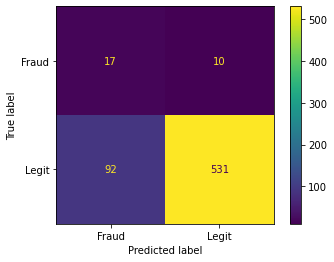

In [39]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [40]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

